#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [318]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import inv

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [319]:
df = pd.read_csv('data.csv', dtype=np.float64)

In [320]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

In [321]:
#STEP 2
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1) #splitting training set and test dataset
x_train, x_validate,y_train, y_validate = train_test_split(x_train, y_train, test_size =.125, random_state = 1)#splitting again for validation dataset
print(x_train.shape, x_test.shape,x_validate.shape)
print(y_train.shape, y_test.shape, y_validate.shape)

(64755, 15) (18502, 15) (9251, 15)
(64755, 1) (18502, 1) (9251, 1)


#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [322]:
#STEP 3

for i in range(15):
    x_scaled = (x[:,i] - np.min(x[:,i]))/(np.max(x[:,i]) - np.min(x[:,i])) #performing the scaling function
    x[:,i] = x_scaled #replacing values in the initial array with the scaled values

print(x.shape)

#splitting again after normalizing or scaling to get the new values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)
x_train, x_validate,y_train, y_validate = train_test_split(x_train, y_train, test_size =.125, random_state = 1)
print(x_train.shape, x_test.shape,x_validate.shape)
print(y_train.shape, y_test.shape, y_validate.shape)


(92508, 15)
(64755, 15) (18502, 15) (9251, 15)
(64755, 1) (18502, 1) (9251, 1)


### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [356]:
lr = 0.1 #learning rate
epoch = 1000 #number of epochs
n = x_train.shape[1] 
Theta = np.ones((n,1)) #initializing value of weights, theta are my weights and the bias.

#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [367]:
# STEP 5

def LinearRegression_with_gradient_descent(x_train, y_train, lr, epoch, x_validate, y_validate,x_test,y_test):
    m = x_train.shape[0]  # number of samples
    m_1 = x_validate.shape[0]
    m_2 = x_test.shape[0]
    ones_2 = np.ones((m_2,1))
    ones_1 = np.ones((m_1,1))
    ones =np.ones((m,1))  
    x_train = np.concatenate((ones, x_train), axis=1)   # New x_train with x_train 0's = 1
    x_validate = np.concatenate((ones_1, x_validate), axis=1) #new x_validate with x_validate 0's = 1
    x_test = np.concatenate((ones_2,x_test), axis=1) #New x_test with x_test 0's = 1
    n = x_train.shape[1]  
    Theta = np.ones((n,1))    # parameter initialization
    
    h = np.dot(x_train, Theta)   # initial hypothesis for training data 
    h_validation = np.dot(x_validate,Theta) #initial hypothesis for validation data
    h_test = np.dot(x_test,Theta) #initial hypothesis for testing data
   
    #initializing error list to capture error on training data 
    cost = np.ones(epoch)
    #initializing error list to capture error on validation data
    cost_validate = np.ones(epoch)
    #initializing error list to capture error on testing data 
    cost_test = np.ones(epoch)
    
#start of gradient descent
# for loop for epoch is started here 
    for i in range (0, epoch):
#getting value of the bias w0 through partial differention
        Theta[0] = Theta[0] - (lr / x_train.shape[0]) * np.sum((h - y_train))
        for j in range(1, n):
#finding predicted value using partial diffrentiation
            Theta[j]= Theta[j] - (lr/ x_train.shape[0]) * np.sum(((h-y_train).T.dot(x_train[:, j])))
#hypothesis for training set
        h  = np.dot(x_train, Theta) 
# list for storing mean squared error for training set 
        cost[i] = 1/(2*m) * np.sum((np.square(h-y_train)))
#hypothesis for validation set
        h_validation = np.dot(x_validate,Theta)
#list for storing mean squared error for validation
        cost_validate[i] = 1/(2*m) * np.sum((np.square(h_validation-y_validate)))
#hypothesis for test set
        h_test = np.dot(x_test,Theta)
#list for storing mean squared error for testing data
        cost_test[i] = 1/(2*m) * np.sum((np.square(h_test-y_test)))
        
    return cost,cost_validate,Theta,cost_test

In [368]:
cost,cost_validation,Theta,cost_test = LinearRegression_with_gradient_descent(x_train, y_train, lr, epoch, x_validate, y_validate,x_test,y_test)
#printing the minimum value of weights found after 1000 iterations
print("weights",theta)

shape of theta (16, 1)
weights [[-187451.16923537]
 [  34288.71086439]
 [  41395.63454867]
 [1934330.88979432]
 [ 803965.01375665]
 [ 180884.09953262]
 [  30622.76209051]
 [ 149098.52567735]
 [ 112119.79192646]
 [ -10272.83406739]
 [  86245.491035  ]
 [  70984.2460661 ]
 [ 201583.98585966]
 [ -50105.15249594]
 [ 186988.41672964]
 [ -59346.53164498]]


#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

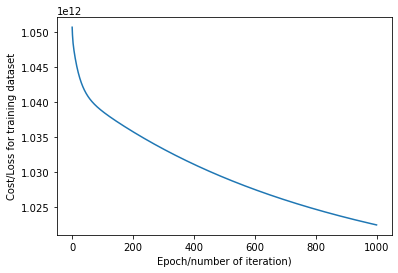

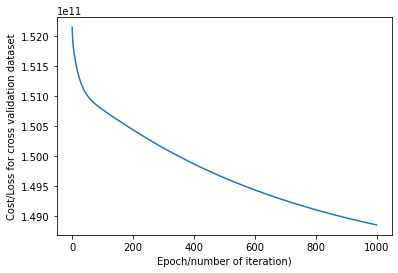

In [369]:
# STEP 6

# plotting the plot for cost/error that I got from training set
plt.plot(cost)
plt.xlabel("Epoch/number of iteration)")
plt.ylabel( "Cost/Loss for training dataset")
plt.show()

#plotting the plot for cost/error that I got from the validation set
plt.plot(cost_validation)
plt.xlabel("Epoch/number of iteration)")
plt.ylabel( "Cost/Loss for cross validation dataset")
plt.show()

In [370]:
#R2 score of the trained model for train, test and validation splits

#finding R2 for training set
sst = np.sum(np.square(y_train - np.mean(y_train,axis=0)))
sse =  cost[-1]
r2_train = 1 - (sse/sst)
print ("r2 for train", r2_train)

#finding R2 for test samples
sse_test = cost_test[-1]
sst_test = np.sum(np.square(y_test - np.mean(y_test,axis=0)))
r2_test =  1 - (sse_test/sst_test)
print("r2 for test", r2_test)

#finding R2 for validation set
sst_validate = np.sum(np.square(y_validate - np.mean(y_validate,axis=0)))
sse_validate = cost_validation[-1]
r2_validate = 1 - (sse_validate/sst_validate)
print("r2 for validate", r2_validate)


r2 for train 0.9999924520780031
r2 for test 0.9999927044105182
r2 for validate 0.9999924185673947
